# Outlier Visualization
This notebook loads the training and test datasets from the project’s root directory and performs preprocessing using `load_and_preprocess_data`.
The features are scaled and the labels are encoded to prepare the data for modeling.

We then apply Local Outlier Factor (LOF) to analyze outliers in the dataset. 
LOF measures how isolated each point is relative to its local neighborhood. It assigns each sample as inlier or outlier

A scatter plot is produced using the first two feature dimensions.
Inliers appear as blue dots.
Outliers are shown as red X markers

This visualization helps us understand where anomalies occur, whether they show structure, and whether they represent meaningful patterns or just noise.

From the plot, the outliers (red Xs) appear randomly scattered away from high-density regions. This suggests random measurement errors or extreme anomalies as there is no visible structure or cluster pattern among the outliers.
- They do not group into a separate meaningful cluster.
- They do not represent a rare class.
- They are unlikely to contain useful information

Therefore, we decided to remove these found outliers in the training.

In [1]:
from typing import Tuple
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

def visualize_outliers(
    X_scaled: np.ndarray, 
    y_encoded: np.ndarray, 
    contamination: float = 0.01
) -> None:
    """
    Detect and visualize outliers using Local Outlier Factor (LOF) 
    without removing any data points.
    """
    lof = LocalOutlierFactor(n_neighbors=10, contamination=contamination)
    
    # -1 = outlier, 1 = inlier
    outlier_labels = lof.fit_predict(X_scaled)

    # Identify inliers and outliers
    mask_inliers = outlier_labels == 1
    mask_outliers = outlier_labels == -1

    X_inliers = X_scaled[mask_inliers]
    X_outliers = X_scaled[mask_outliers]

    # Visualization
    plt.figure(figsize=(7, 6))
    plt.scatter(X_inliers[:, 0], X_inliers[:, 1], c='blue', s=20, label='Inliers')
    plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red', s=50, marker='x', label='Outliers')
    plt.title("Local Outlier Factor (LOF) – Outlier Visualization Only")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

    print(f"[Outlier Detection] Detected {np.sum(mask_outliers)} outliers (no removal).")

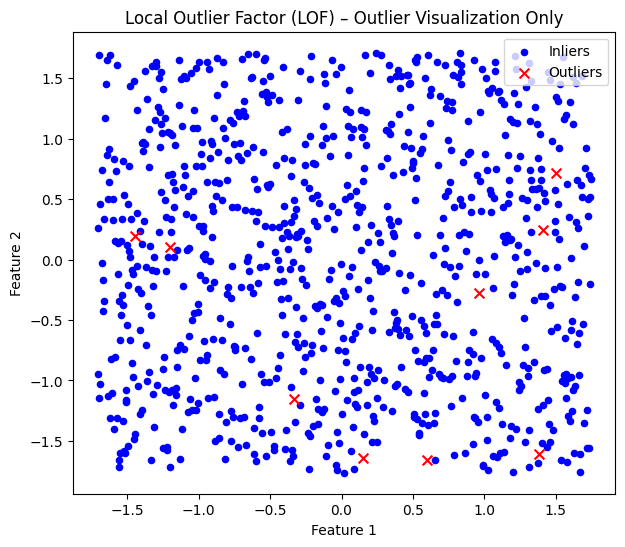

[Outlier Detection] Detected 9 outliers (no removal).


In [2]:
import os

from aki.utils import find_project_root
from aki.core.preprocessing import load_and_preprocess_data

PROJECT_ROOT = find_project_root()

train_path = os.path.join(PROJECT_ROOT, "data", "train_data.csv")
test_path = os.path.join(PROJECT_ROOT, "data", "test_data.csv")

X_train_raw, X_test_raw, y_train, y_test, X_train_scaled, X_test_scaled, label_encoder, scaler = (
    load_and_preprocess_data(
        train_path,
        test_path
    )
)

visualize_outliers(X_train_scaled, y_train)
